<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/kursPawe%C5%82Krakowiak/ML-decision-trees-and-random-forests/decision_trees/classification/07_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

## Heart Disease - Przewidywanie choroby serca

### Import bibliotek

In [ ]:
print("#############################################")
print("Etap7. Odcinek1: Model predykcji choroby serca.")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

#############################################
Etap7. Odcinek1: Model predykcji choroby serca.


### Pobranie danych z bukcetu S3 (usługa w chmurze Amazon)

In [ ]:
%%bash
# flaga -q wycisza niepotrzebny output
wget -q https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/datasets/heart.csv

### Poznaj swoje dane
### Opis wybranych zmiennych

- cp: chest pain type (4 wartości)
- trestbps: spoczynkowe ciśnienie krwi
- chol: cholesterol
- fbs: cukier we krwi na czczo
- restecg: spoczynkowe EKG
- thalach: maksymalne tetno
- exang: duszność spowodowana wysiłkiem ('yes' = 1, 'no' = 0)

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe().apply(lambda x: round(x, 2))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [ ]:
# X to df złożona ze wszystkich kolumn oprócz ostatniej 
X = df[df.columns[:-1]]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", y_test.shape)

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

X_train.shape (227, 13)
X_test.shape (76, 13)
y_train.shape (227,)
X_test.shape (76,)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dokladnosc = tree.score(X_test, y_test)
print(dokladnosc)

0.7894736842105263


In [ ]:
y_pred = tree.predict(X_test)

In [ ]:
# wektor przewidzianych predykcji na podstawie modelu
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1])

In [ ]:
for value in y_test:
    print(value, end=",")

0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,1,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,1,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,1,0,1,

In [ ]:
# porównanie wektora prawdziwego y_test z przewidywanym t_pred
# za pomocą metryki accuracy_score
accuracy_score(y_test, y_pred)

0.7894736842105263

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


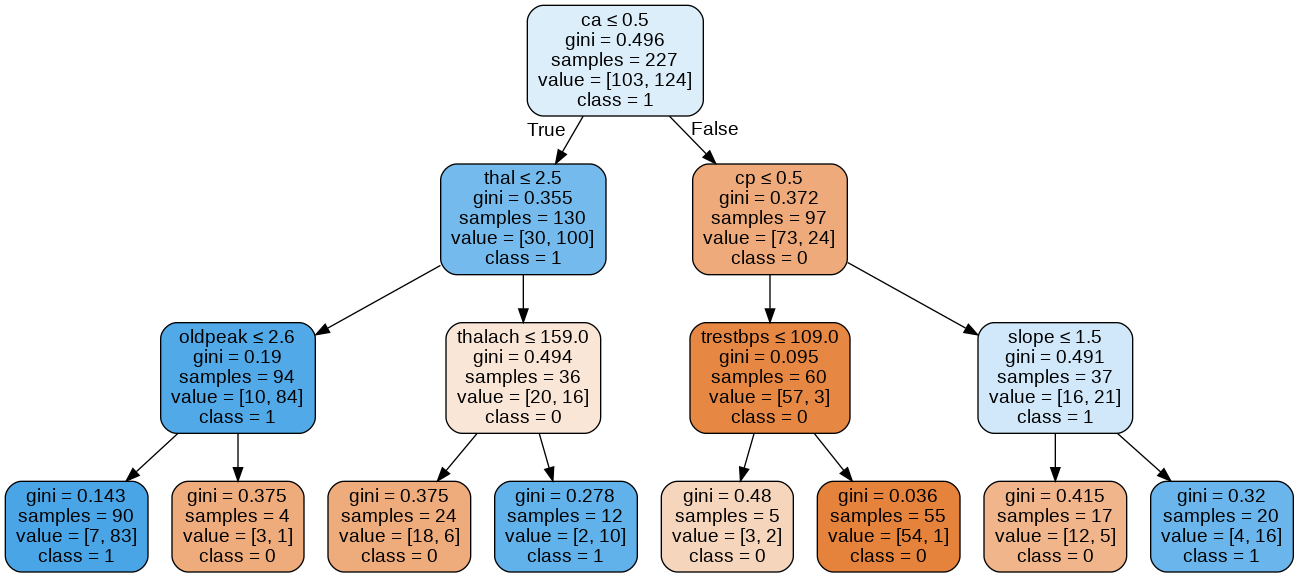

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names=df.columns[:-1],
               class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

### Moje: robię GridSearchCV

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

moje_tree = DecisionTreeClassifier()

# siatka parametrów do naszego grid_search
# min_samples_leaf to minimalna liczba próbek na liściu
params = {'max_depth': np.arange(1, 10),
         'min_samples_leaf': [1, 5, 10, 15, 20]}

# chcę zmaksymalizować accuracy. Estymatorem jest tree. Optymalizuje wzgl dokładności.
# n_jobs to ilość użytych rdzeni procesora (-1 to wszystkie)
grid_search = GridSearchCV(moje_tree, param_grid=params, n_jobs=-1, scoring='accuracy', cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
      

In [ ]:
# atrybut obiektu grid_search
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 15}

In [ ]:
print('Dokładność na zbiorze treningowym: {:4f}'.format(grid_search.score(X_train, y_train)))

Dokładność na zbiorze treningowym: 0.863436
